In [1]:
from bilob.model.dataset import WindowData, TimeSeriesDataset
import os
from tqdm import tqdm
import numpy as np
import torch

In [2]:
int(100**0.5)

10

In [3]:


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

data_local_directory = '../resources'
list_data_files = os.listdir(data_local_directory)
list_data_files = [data_file for data_file in list_data_files if 'BTC' in data_file]
print(f'{len(list_data_files)} files loading')

list_data = []
for file_each in tqdm(list_data_files):
    list_data.append(np.loadtxt(os.path.join(data_local_directory, file_each)))



Using device: cpu
13 files loading


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.49it/s]


In [4]:
window_data = WindowData(*list_data)
dataset = TimeSeriesDataset(window_data, change=0.001, prediction_horizon=400, smoothing='linear')

In [5]:
dataset.labels

array([2, 2, 2, ..., 0, 0, 2])

In [6]:
import matplotlib.pyplot as plt


In [7]:
dataset.smoothed_prices

array([    0.        ,     0.        ,     0.        , ...,
       98975.90024901, 98974.66816729, 98973.19028962])

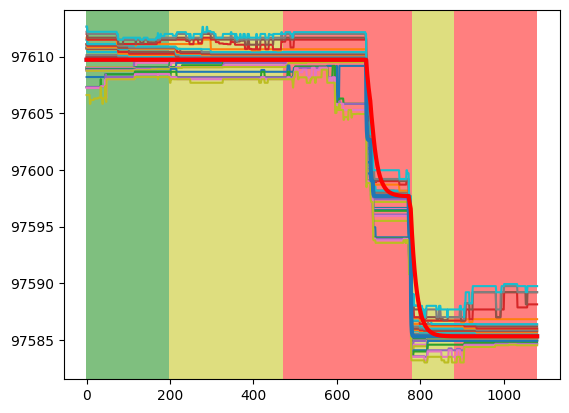

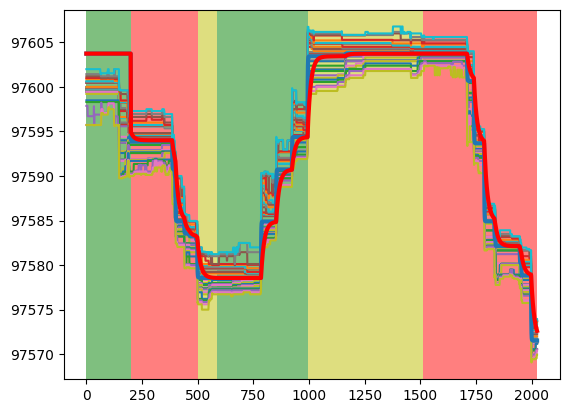

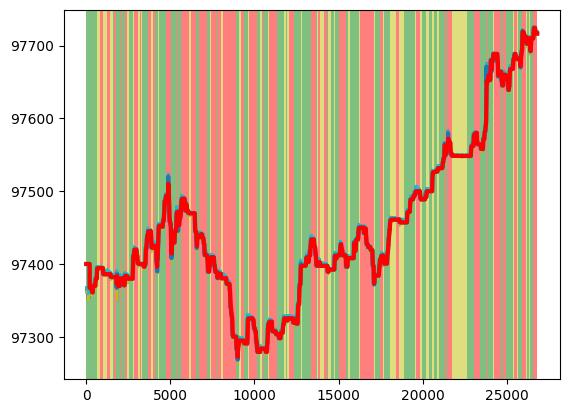

IndexError: index 30117 is out of bounds for axis 0 with size 8596

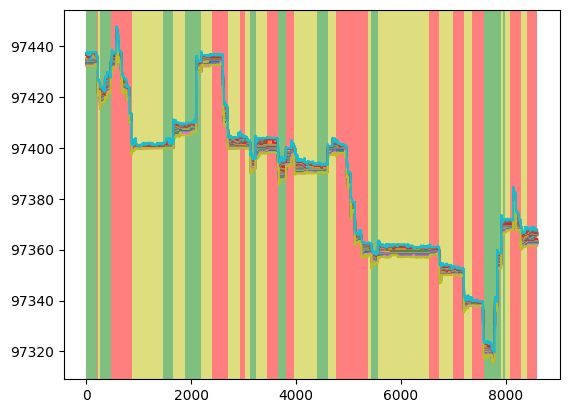

In [17]:
window_data = WindowData(*list_data)
dataset = TimeSeriesDataset(window_data, change=0.001, prediction_horizon=400, time_steps=200)
dataset2 = TimeSeriesDataset(window_data, change=0.001, prediction_horizon=400, time_steps=200, smoothing='exponential')
i = 0
for index_sequence in range(len(dataset.data)):
    level_prices = dataset.data.sequences[index_sequence][:80:2,:].T
    plt.plot(level_prices[:,:])
    start = i
    for index_element in range(level_prices.shape[0]):
        label = dataset.labels[i]
        i+=1
        color = ''
        match label:
            case 0:
                color = 'r'
            case 1:
                color = 'y'
            case 2:
                color = 'g'
                
        plt.axvspan(index_element-0.5, index_element+0.5, color=color, alpha=0.5, lw=0)
    
    mid_smoothed = dataset.smoothed_prices[start:i]
    mid_smoothed[0: 200] = mid_smoothed[start+200]
    mid_smoothed_2 = dataset2.smoothed_prices[start:i]
    mid_smoothed_2[0: 200] = mid_smoothed[start+200]
    plt.plot(mid_smoothed,linewidth=3)
    plt.plot(mid_smoothed_2,linewidth=3, color='r')
        
    plt.show()
    

In [26]:
size = 3
weights = torch.exp(torch.linspace(0, np.sqrt(size), size))
_smooth_weights = weights/torch.sum(weights)
print(_smooth_weights)
np.convolve([3,2,3,4,5],_smooth_weights, 'valid')


tensor([0.1107, 0.2633, 0.6260])


array([2.73670772, 2.48478386, 3.4847838 ])

In [18]:
dataset._smooth_weights

tensor([6.5936e-01, 2.2461e-01, 7.6510e-02, 2.6063e-02, 8.8780e-03, 3.0242e-03,
        1.0302e-03, 3.5092e-04, 1.1954e-04, 4.0720e-05, 1.3871e-05, 4.7250e-06,
        1.6095e-06, 5.4828e-07, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+

In [ ]:
data_e = dataset.data.sequences[index_sequence]
data_e.shape

In [ ]:
data_e[:80:2,:] - 90000

In [ ]:
dataset = TimeSeriesDataset(window_data, change=0.001, skip = 10, time_steps = 400, step=1)

In [ ]:
data_e = dataset.data.sequences[index_sequence]
data_e.shape

In [ ]:
x, y = dataset.__getitem__(0)
print(x.shape)
print(y.shape)